In [1]:
import sys
sys.path.append('/Users/cheng/Google Drive/PhD/Research/Portfolio Selection via TBN/codes/')
from module.strategy import *
from itertools import chain
import nonlinshrink as nls
from sklearn.covariance import LedoitWolf
from sklearn.covariance import OAS
from scipy.stats import moment
import numpy as np
import pandas as pd

from module.data_handler import data_handler

# Sample size effect on shrunk portfolio

In [2]:
def get_backtesting_performance_vector(strategy_object: object) -> np.array:
    '''
    Given a portfolio stratgy, the Sharpe ratio and average turnover are returned
    '''

    # backtesting period
    year_start = 2001
    year_end = 2017

    # get backtesting time series
    portfolio_returns_vector = strategy_object.get_portfolio_daily_return(year_start, year_end)
    sharpe_ratio = strategy_object.get_sharpe_ratio()
    turnover_vector = strategy_object.get_turn_over_for_each_period()

    # get backtesting performance indicator
    #sharpe_ratio = np.mean(sharpe_ratio_vector)
    turnover = np.mean(turnover_vector)

    return np.array([sharpe_ratio, turnover])

## Sample size 150

In [3]:
# strategy agents
sample_size = 150
shrink_0_pct = Shrink_0(sample_size)
shrink_50_pct = Shrink_50(sample_size)
shrink_100_pct = Shrink_100(sample_size)
shrink_ledoit = Linear_shrink_ledoit(sample_size)

shrink_0_pct_tbn = Shrink_0_tbn(sample_size)
shrink_50_pct_tbn = Shrink_50_tbn(sample_size)
shrink_100_pct_tbn = Shrink_100_tbn(sample_size)
shrink_tbn = Linear_shrink_tbn(sample_size)

# strategy vector
strategy_dict = {'shrink 0 pct': shrink_0_pct, 
                       'shrink 50 pct': shrink_50_pct,
                       'shrink 100 pct': shrink_100_pct, 
                       'shrink ledoit': shrink_ledoit, 
                       'shrink 0 pct tbn': shrink_0_pct_tbn, 
                       'shrink 50 pct tbn': shrink_50_pct_tbn, 
                       'shrink 100 pct tbn': shrink_100_pct_tbn, 
                       'shrink_tbn': shrink_tbn
}

# backtest strategies
backtest_performance_dict = {strategy_name: get_backtesting_performance_vector(strategy) for strategy_name, strategy in strategy_dict.items()}
backtest_performance_df = pd.DataFrame(backtest_performance_dict).T
backtest_performance_df.columns = ['Sharpe ratio', 'Turnover']
backtest_performance_df

,Sharpe ratio,Turnover
shrink 0 pct,0.803892,3.486161
shrink 50 pct,0.698904,0.242921
shrink 100 pct,0.677564,0.000000
shrink ledoit,0.869363,2.248338
shrink 0 pct tbn,0.803892,3.486161
shrink 50 pct tbn,0.907298,0.980764
shrink 100 pct tbn,0.728605,0.242698
shrink_tbn,0.884363,2.574858


In [5]:
file_name = 'performance_table_150'
label = 'tbl:sample 150'
caption = 'Backtesting performance table on 150 companies from S\&P 500'

data_handler.export_dataframe_to_latex_table(backtest_performance_df, 
                                             table_name=file_name,
                                             caption=caption,
                                             label=label)

## Sample size 50

In [6]:
# strategy agents
sample_size = 50
shrink_0_pct = Shrink_0(sample_size)
shrink_50_pct = Shrink_50(sample_size)
shrink_100_pct = Shrink_100(sample_size)
shrink_ledoit = Linear_shrink_ledoit(sample_size)

shrink_0_pct_tbn = Shrink_0_tbn(sample_size)
shrink_50_pct_tbn = Shrink_50_tbn(sample_size)
shrink_100_pct_tbn = Shrink_100_tbn(sample_size)
shrink_tbn = Linear_shrink_tbn(sample_size)

# strategy vector
strategy_dict = {'shrink 0 pct': shrink_0_pct, 
                       'shrink 50 pct': shrink_50_pct,
                       'shrink 100 pct': shrink_100_pct, 
                       'shrink ledoit': shrink_ledoit, 
                       'shrink 0 pct tbn': shrink_0_pct_tbn, 
                       'shrink 50 pct tbn': shrink_50_pct_tbn, 
                       'shrink 100 pct tbn': shrink_100_pct_tbn, 
                       'shrink_tbn': shrink_tbn
}

# backtest strategies
backtest_performance_dict = {strategy_name: get_backtesting_performance_vector(strategy) for strategy_name, strategy in strategy_dict.items()}
backtest_performance_df = pd.DataFrame(backtest_performance_dict).T
backtest_performance_df.columns = ['Sharpe ratio', 'Turnover']
backtest_performance_df

,Sharpe ratio,Turnover
shrink 0 pct,0.869241,1.233276
shrink 50 pct,0.610971,0.114586
shrink 100 pct,0.624750,0.000000
shrink ledoit,0.841458,1.017372
shrink 0 pct tbn,0.869241,1.233276
shrink 50 pct tbn,0.824150,0.507178
shrink 100 pct tbn,0.679001,0.166060
shrink_tbn,0.876190,1.100735


In [7]:
file_name = 'performance_table_50'
label = 'tbl:sample 50'
caption = 'Backtesting performance table on 50 companies from S\&P 500'

data_handler.export_dataframe_to_latex_table(backtest_performance_df, 
                                             table_name=file_name,
                                             caption=caption,
                                             label=label)

## Shrink to TBN

In [2]:
GMVP_backtest = Linear_shrink_tbn()

In [3]:
linear_shrink_tbn = Linear_shrink_tbn()
year_start = 2001
year_end = 2017
returns = linear_shrink_tbn.get_portfolio_daily_return(year_start, year_end)
rf = linear_shrink_tbn.get_sharpe_ratio()
to = linear_shrink_tbn.get_turn_over_for_each_period()

In [4]:
np.mean(to)

2.574858075971069

# Vectorized Backtesting

In [8]:
class GMVP_backtesting(vectorized_backtesting):
    def get_portfolio(self, year):
        portfolio = self.get_GMVP(volatility_vector = self.volatility_aggregate.loc[year - 1], 
                            correlation_matrix = self.correlation_aggregate.loc[year - 1])
        return portfolio


In [10]:
GMVP_backtest = GMVP_backtesting()
year_start = 1999
year_end = 2003
returns = GMVP_backtest.get_portfolio_daily_return(year_start, year_end)
rf = GMVP_backtest.get_sharpe_ratio()
to = GMVP_backtest.get_turn_over_for_each_period()

# Portfolio Turnover

$$\hat{W} = \sum_{i = 1}^N(w_{i,t+1} - w_{i,t})1_{\{w > 0\}}$$
$$\tilde{W} = \sum_{i = 1}^N(w_{i,t+1} - w_{i,t})1_{\{w < 0\}}$$
$$W = min\{\hat{W}, \tilde{W}\}$$
$$P = \frac{P_{t+1} + P_{t}}{2}$$
$$TO = \frac{W}{P}$$

The above equation can ben simplify to below equation
$$T O=\frac{1}{T} \sum_{t=1}^{T} \sum_{j=1}^{N}\left(\left|w_{j, t+1}-w_{j, t}\right|\right)$$

In [ ]:
def get_turn_over_for_each_period(port_list):
        def get_turn_over_for_one_period(port_1, port_2):
            sell_and_buy = np.abs(np.array(port_2) - np.array(port_1))
            turn_over = sell_and_buy.sum() / 2
            return turn_over

        before_balance = port_list[:-1]
        after_balance = port_list[1:]
        turn_over_list = [get_turn_over_for_one_period(port_1, port_2) \
                          for port_1, port_2 in zip(before_balance, after_balance)]

        return turn_over_list

In [ ]:
port_1 = [0.1, 0.2, 0.3, 0.3, 0.1]
port_2 = [0.2, 0.3, 0.2, 0.15, 0.15]
port_3 = [0.2, 0.2, 0.2, 0.2, 0.2]
port_list = [port_1, port_2, port_3]

In [ ]:
get_turn_over_for_each_period(port_list)

[0.24999999999999997, 0.1]

# Shrinkage Strategy

## linear shrink ledoit

In [12]:
class Linear_shrink_ledoit(vectorized_backtesting):
    def get_portfolio(self, year):
        covariance_shrunk = LedoitWolf().fit(self.stocks_returns_aggregate.loc[year - 1]).covariance_
        portfolio = self.get_GMVP(covariance_matrix=  covariance_shrunk)
        return portfolio

In [7]:
linear_ledoit = Linear_shrink_ledoit()
year_start = 2001
year_end = 2017
returns = linear_ledoit.get_portfolio_daily_return(year_start, year_end)
sr = linear_ledoit.get_sharpe_ratio()
to = linear_ledoit.get_turn_over_for_each_period()

In [10]:
np.mean(to)

0.7263141059945284

## non-linear shrink ledoit

In [11]:
import nonlinshrink as nls

In [ ]:
class Nonlinear_shrink_ledoit(vectorized_backtesting):
    def get_portfolio(self, year):
        covariance_shrunk = nls.shrink_cov(self.stocks_returns_aggregate.loc[year - 1])
        portfolio = self.get_GMVP(covariance_matrix = covariance_shrunk)
        return portfolio

In [15]:
backtest = Nonlinear_shrink_ledoit()
year_start = 2001
year_end = 2017
returns = backtest.get_portfolio_daily_return(year_start, year_end)
sr = backtest.get_sharpe_ratio()
to = backtest.get_turn_over_for_each_period()

In [17]:
np.mean(to)

0.7174648450918499

# Naive shrinkage

In [ ]:
class Shrink_50_tbn(vectorized_backtesting):
    def get_portfolio(self, year):
        covariance_shrunk = self.get_shrank_cov(correlation_matrix=self.correlation_aggregate.loc[year - 1].values,\
                                                shrink_target=self.tbn_combined.loc[year - 1].values,\
                                                volatility_vector=self.volatility_aggregate.loc[year - 1].values,
                                                a=0.5)
        portfolio = self.get_GMVP(covariance_matrix = covariance_shrunk)
        return portfolio

In [22]:
backtest = Shrink_100()
year_start = 2001
year_end = 2017
returns = backtest.get_portfolio_daily_return(year_start, year_end)
sr = backtest.get_sharpe_ratio()
to = backtest.get_turn_over_for_each_period()
print(sr)
print(np.mean(to))

0.5336623138795615
0.06708634851044798


# Minimum Spanning Tree

In [ ]:
class MST_stock(vectorized_backtesting):
    '''
    Perform MST on stock returns' correlation
    '''
    def get_portfolio(self, year):
        get_distance_i_j = lambda rho, p = 2: np.sqrt(1 - abs(rho ** p))
        distance_matrix_stock = self.correlation_aggregate.loc[year - 1].apply(get_distance_i_j, args=[2])
        MST_stock = minimum_spanning_tree(distance_matrix_stock)
        MST_stock = MST_stock.toarray().astype(float)
        MST_stock = np.maximum(MST_stock, MST_stock.transpose())
        np.fill_diagonal(MST_stock, 1)
        portfolio = self.get_GMVP( volatility_vector = self.volatility_aggregate.loc[year - 1], 
                            correlation_matrix = MST_stock)
        return portfolio

In [ ]:
class MST_tbn(vectorized_backtesting):
    '''
    Perform MST on Text Based Network
    '''
    def get_portfolio(self, year):
        get_distance_i_j = lambda rho, p = 2: np.sqrt(1 - abs(rho ** p))
        distance_matrix = self.tbn_combined.loc[year - 1].apply(get_distance_i_j, args=[2])
        MST = minimum_spanning_tree(distance_matrix)
        MST = MST.toarray().astype(float)
        MST = np.maximum(MST, MST.transpose())
        np.fill_diagonal(MST, 1)
        portfolio = self.get_GMVP( volatility_vector = self.volatility_aggregate.loc[year - 1], 
                            correlation_matrix = MST)
        return portfolio

# Multi strategies

In [ ]:
strategy_list = [MST_tbn(), MST_stock(), ]
strategy_names = ['MST on TBN', 'MST on stock']
year_start = 1997
year_end = 2018

In [ ]:
returns_list = [strategy.get_portfolio_daily_return(year_start, year_end) for strategy in strategy_list]
sharpe_ratio_list = [strategy.get_sharpe_ratio()for strategy in strategy_list]
turn_over_list = [strategy.get_turn_over_for_each_period()for strategy in strategy_list]

In [ ]:
turn_over_df = pd.DataFrame(turn_over_list, index=strategy_names, columns=range(1998, 2019)).T

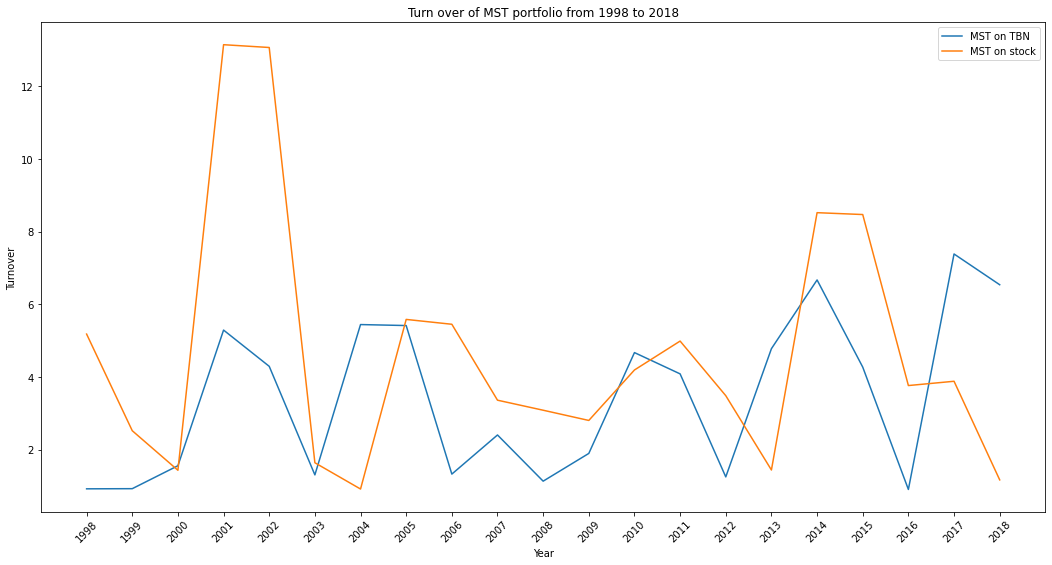

In [ ]:
plot = turn_over_df.plot(title = 'Turn over of MST portfolio from 1998 to 2018',
                        xlabel = 'Year',
                        ylabel = 'Turnover',
                        figsize = (18, 9),
                        xticks = range(1998, 2019),
                        rot = 45)
path = '/Users/cheng/Dropbox/Apps/Overleaf/Portfolio Selection via Text Based Network/picture'
plot.figure.savefig(path+'/Turn over of MST portfolio from 1998 to 2018.png')

In [ ]:
turn_over_df.mean()

MST on TBN      3.451522
MST on stock    4.672345
dtype: float64

In [ ]:
turn_over_average

[Shrink 0 pct      0.803780
 Shrink 50 pct     0.064996
 Shrink 100 pct    0.128055
 dtype: float64]

# Backtrader Test

In [ ]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import datetime  # For datetime objects
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])

# Import the backtrader platform
import backtrader as bt


In [ ]:

# Create a Stratey
class TestStrategy(bt.Strategy):

    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.spy = self.datas[0].close
        self.amzn = self.datas[1].close

        # To keep track of pending orders and buy price/commission
        self.order = None
        self.buyprice = None
        self.buycomm = None

        # time
        # self.month = self.datas[0].datetime.month

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))

                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:  # Sell
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        self.order = None

    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm))

    def next(self):
        month_current = self.datas[0].datetime.date(0).month
        month_next = self.datas[0].datetime.date(1).month

        if month_current != month_next:
            print('rebalance day!')
        # Simply log the closing price of the series from the reference
        self.log('Close 1, %.2f' % self.spy[0])
        self.log('Close 2, %.2f' % self.amzn[0])

        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order:
            return

        # Check if we are in the market
        if not self.position:

            # Not yet ... we MIGHT BUY if ...
            if self.spy[0] < self.spy[-1]:
                    # current close less than previous close

                    if self.spy[-1] < self.spy[-2]:
                        # previous close less than the previous close

                        # BUY, BUY, BUY!!! (with default parameters)
                        self.log('BUY 1 CREATE, %.2f' % self.spy[0])
                        self.log('BUY 2 CREATE, %.2f' % self.amzn[0])

                        # Keep track of the created order to avoid a 2nd order
                        self.order = self.order_target_percent(self.datas[0], target = 0.5)
                        self.order_target_percent(self.datas[1], target = 0.5)

        else:

            # Already in the market ... we might sell
            if len(self) >= (self.bar_executed + 5):
                # SELL, SELL, SELL!!! (with all possible default parameters)
                self.log('SELL 1 CREATE, %.2f' % self.spy[0])
                self.log('SELL 2 CREATE, %.2f' % self.amzn[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.order_target_percent(self.datas[0], target = 0)
                self.order_target_percent(self.datas[1], target = 0)

In [ ]:
# Create a Data Feed
spy = bt.feeds.YahooFinanceData(
    dataname='SPY',
    # Do not pass values before this date
    fromdate=datetime.datetime(2000, 1, 1),
    # Do not pass values before this date
    todate=datetime.datetime(2000, 12, 31),
    # Do not pass values after this date
    reverse=False)

amzn = bt.feeds.YahooFinanceData(
    dataname='AMZN',
    # Do not pass values before this date
    fromdate=datetime.datetime(2000, 1, 1),
    # Do not pass values before this date
    todate=datetime.datetime(2000, 12, 31),
    # Do not pass values after this date
    reverse=False)

In [ ]:
# Create a cerebro entity
cerebro = bt.Cerebro()

# Add a strategy
cerebro.addstrategy(TestStrategy)

# Datas are in a subfolder of the samples. Need to find where the script is
# because it could have been called from anywhere
# modpath = os.path.dirname(os.path.abspath(sys.argv[0]))
# datapath = os.path.join(modpath, '../datas/orcl-1995-2014.txt')
datapath = '/Users/cheng/Google Drive/PhD/Research/Portfolio Selection via TBN/data/orcl-1995-2014.txt'


# Add the Data Feed to Cerebro
cerebro.adddata(spy)
cerebro.adddata(amzn)

# Set our desired cash start
cerebro.broker.setcash(100000.0)

# Set the commission - 0.1% ... divide by 100 to remove the %
cerebro.broker.setcommission(commission=0)

# Print out the starting conditions
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

# Run over everything
cerebro.run()

# Print out the final result
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

-03-07, BUY 1 CREATE, 92.18
2000-03-07, BUY 2 CREATE, 63.50
2000-03-08, BUY EXECUTED, Price: 91.79, Cost: 46996.48, Comm 0.00
2000-03-08, BUY EXECUTED, Price: 63.25, Cost: 46994.75, Comm 0.00
2000-03-08, Close 1, 92.07
2000-03-08, Close 2, 63.62
2000-03-09, Close 1, 94.76
2000-03-09, Close 2, 68.81
2000-03-10, Close 1, 94.25
2000-03-10, Close 2, 66.88
2000-03-13, Close 1, 93.22
2000-03-13, Close 2, 65.31
2000-03-14, Close 1, 91.90
2000-03-14, Close 2, 65.62
2000-03-15, Close 1, 94.04
2000-03-15, Close 2, 63.75
2000-03-15, SELL 1 CREATE, 94.04
2000-03-15, SELL 2 CREATE, 63.75
2000-03-16, SELL EXECUTED, Price: 95.26, Cost: 46996.48, Comm 0.00
2000-03-16, SELL EXECUTED, Price: 62.25, Cost: 46994.75, Comm 0.00
2000-03-16, OPERATION PROFIT, GROSS 1776.64, NET 1776.64
2000-03-16, OPERATION PROFIT, GROSS -743.00, NET -743.00
2000-03-16, Close 1, 98.44
2000-03-16, Close 2, 66.25
2000-03-17, Close 1, 99.09
2000-03-17, Close 2, 64.81
2000-03-20, Close 1, 98.58
2000-03-20, Close 2, 64.19
2000-03-

IndexError: array index out of range

In [ ]:
import datetime

x = datetime.datetime(2020, 5, 17)

In [ ]:
x.month

5